In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 64.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
!pip install xgboost

In [ ]:
DATA_PATH = "/content/Crop_recommendation.csv"

### Attributes Description

1. N - ratio of Nitrogen content in soil
2. P - ratio of Phosphorous content in soil
3. K - ratio of Potassium content in soil
4. temperature - temperature in degree Celsius
5. humidity - relative humidity in %
6. ph - ph value of the soil
7. rainfall - rainfall in mm

## Exploring the Data

In [ ]:
data = pd.read_csv(DATA_PATH)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


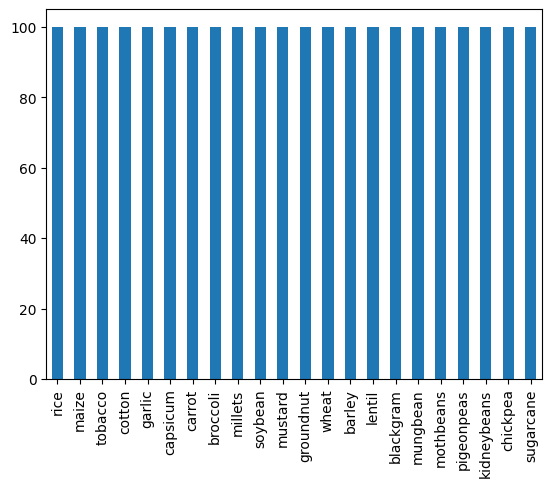

In [ ]:
labels = data["label"].unique()
data["label"].value_counts().plot(kind="bar")
plt.show()

<b>Observation: </b>The dataset is completely balanced. There is no need to balance the data.

## Univariate Analysis

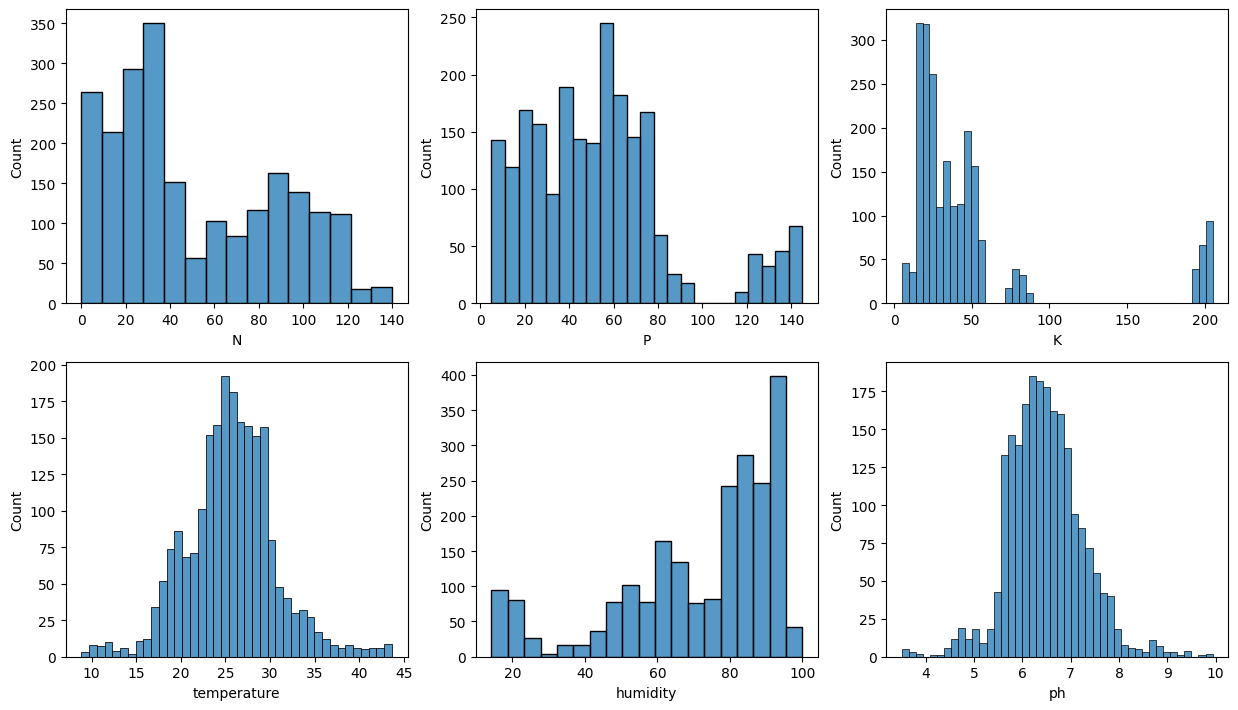

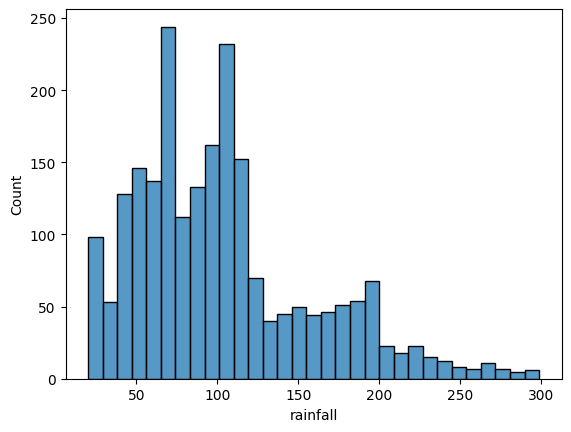

In [ ]:
all_columns = data.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[all_columns[-1]])
plt.show()

In [ ]:
!pip install -U seaborn

## Bivariate Analysis

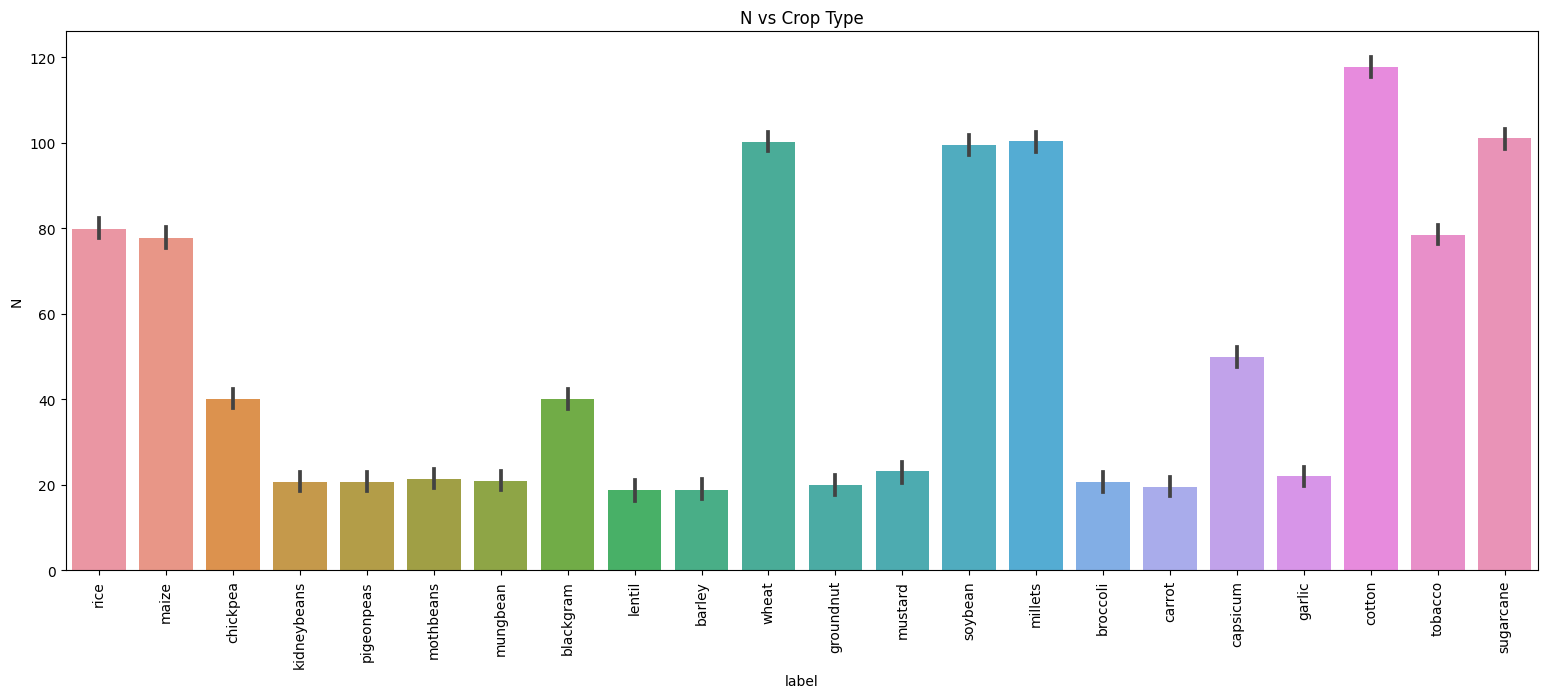

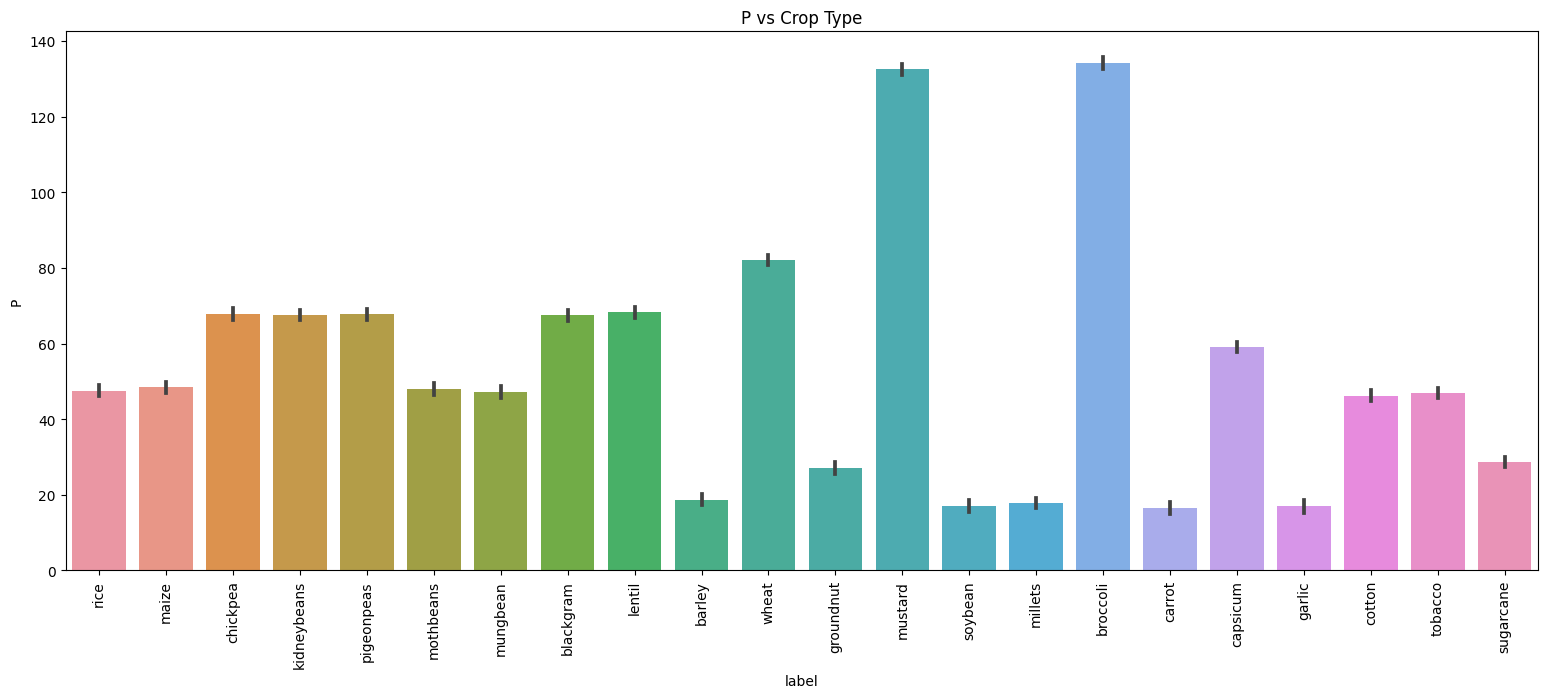

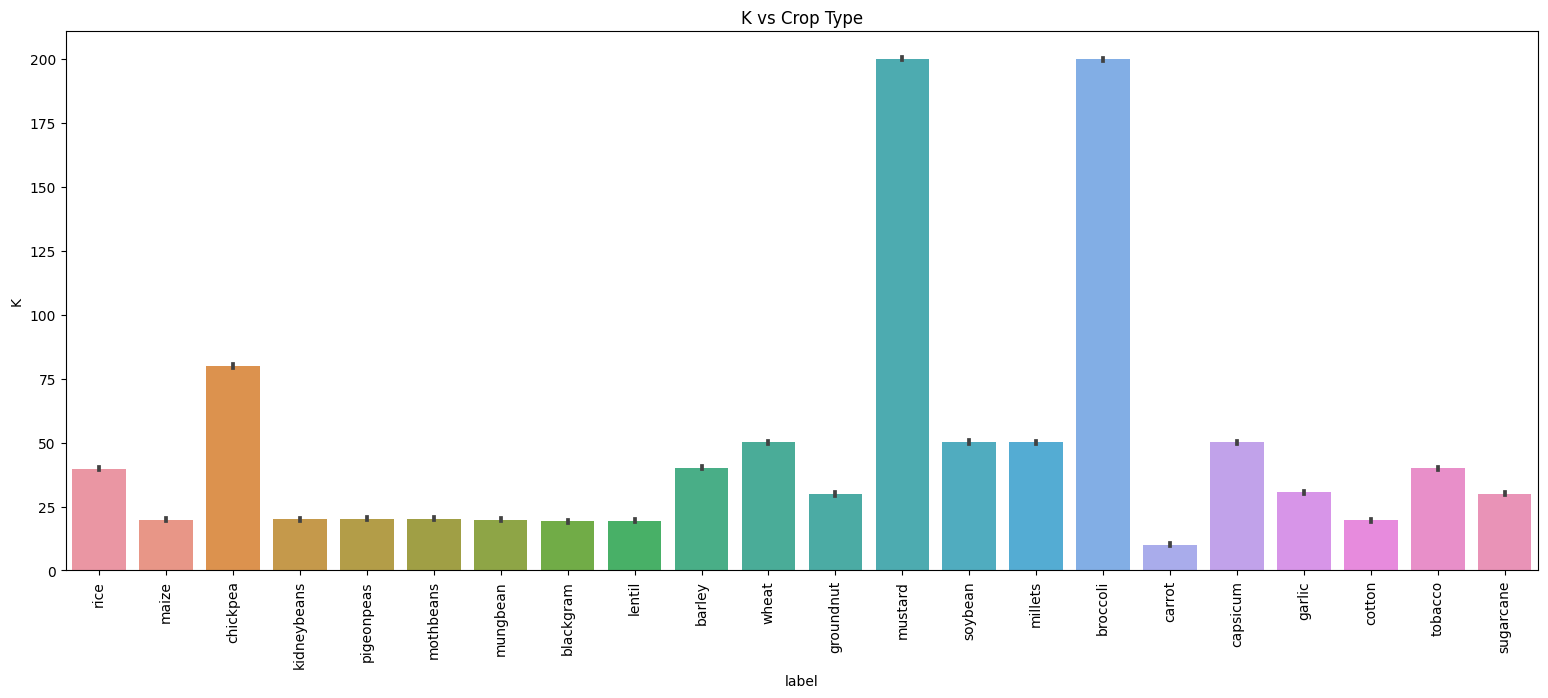

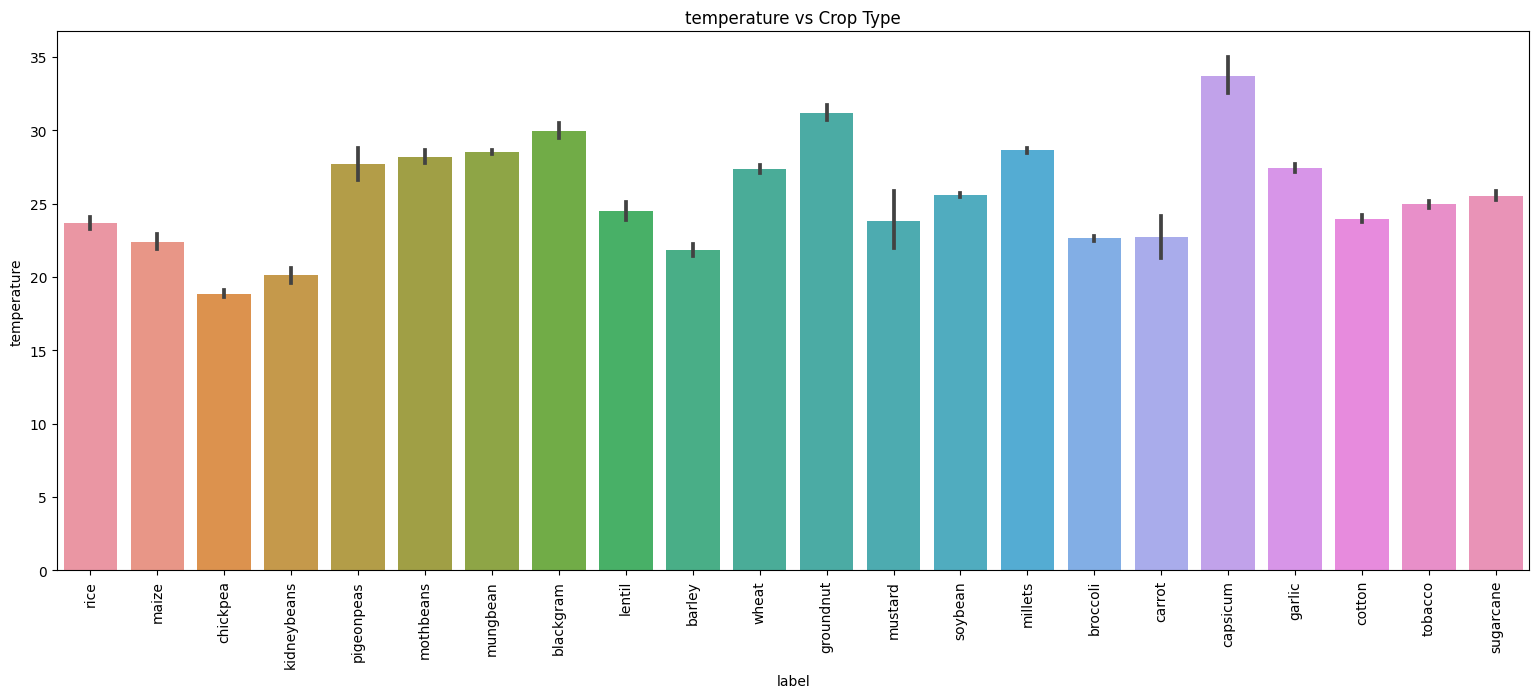

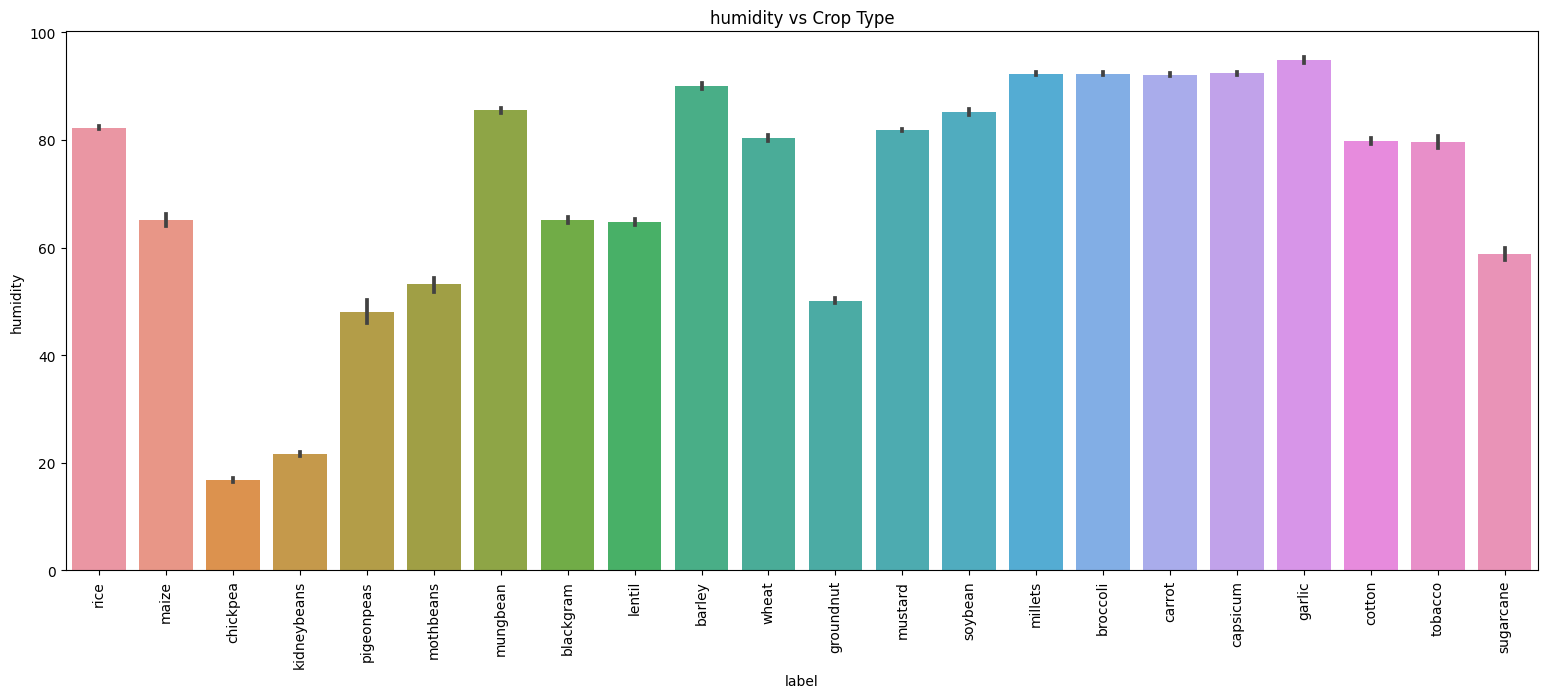

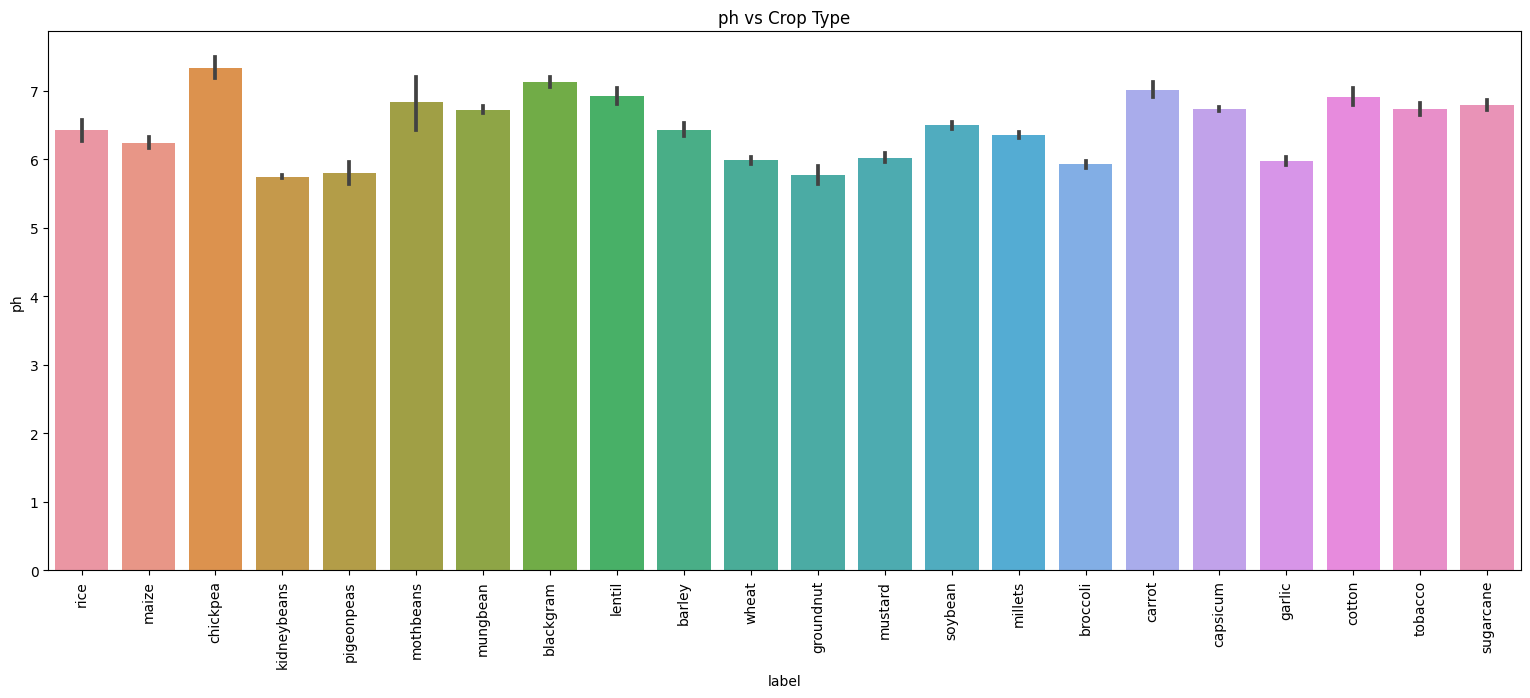

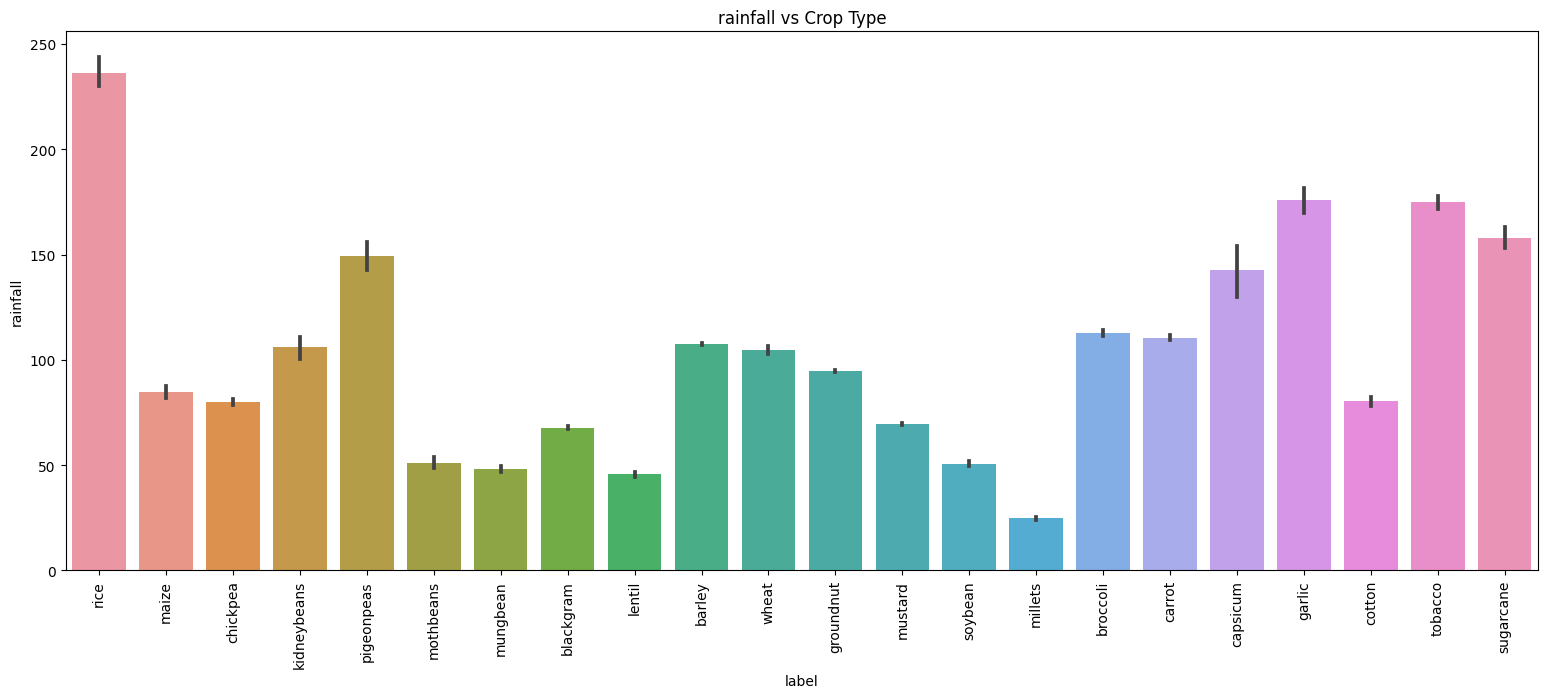

In [ ]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [ ]:
plt.figure(figsize=(19,17))
sns.pairplot(data, hue = "label")
plt.show()

In [ ]:
plt.figure(figsize = (13,11))
sns.heatmap(data.corr(), center = 0, annot = True)
plt.show()

From the pyplot we can see that different clusters are formed based on the features in the dataset.

In [ ]:
label_encoder = LabelEncoder()
X = data[all_columns]
y = label_encoder.fit_transform(data["label"])
print(X.shape, y.shape)

(2200, 7) (2200,)


In [ ]:
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'barley',
 1: 'blackgram',
 2: 'broccoli',
 3: 'capsicum',
 4: 'carrot',
 5: 'chickpea',
 6: 'cotton',
 7: 'garlic',
 8: 'groundnut',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'millets',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'mustard',
 16: 'pigeonpeas',
 17: 'rice',
 18: 'soybean',
 19: 'sugarcane',
 20: 'tobacco',
 21: 'wheat'}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Train Data: (440, 7), (440,)


## XGBoost Classifier

Accuracy on Test Data: 99.77272727272727%


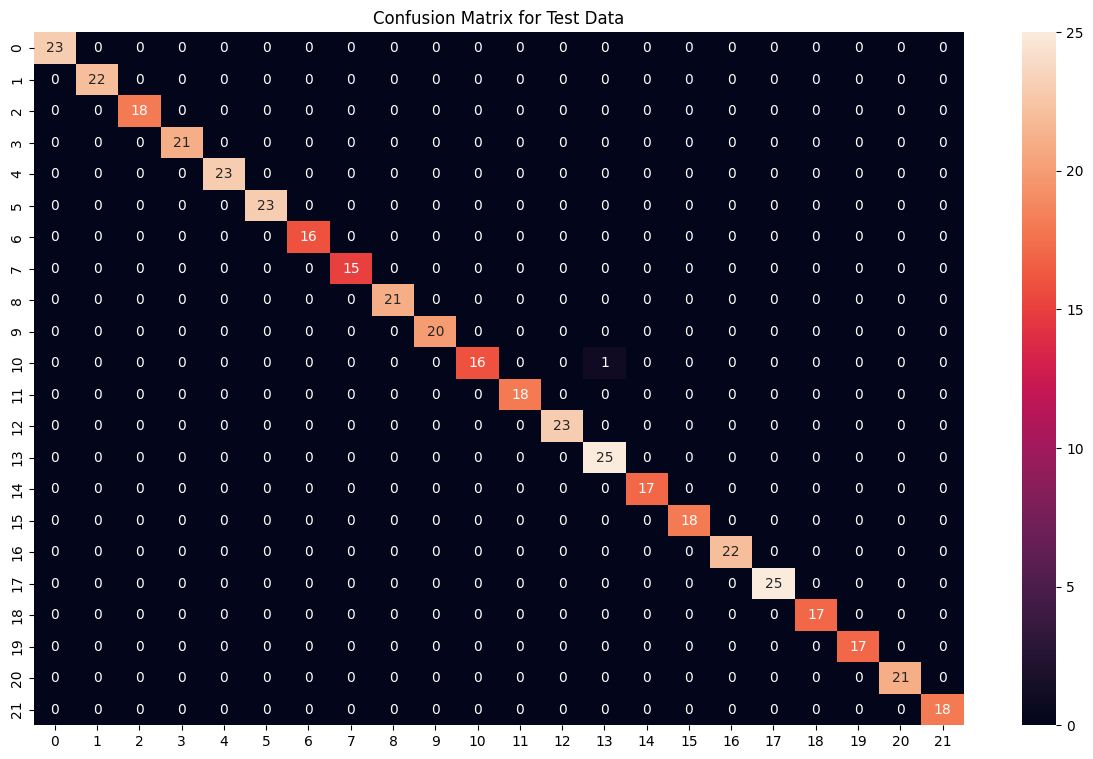


Accuracy on Whole Data: 99.95454545454545%


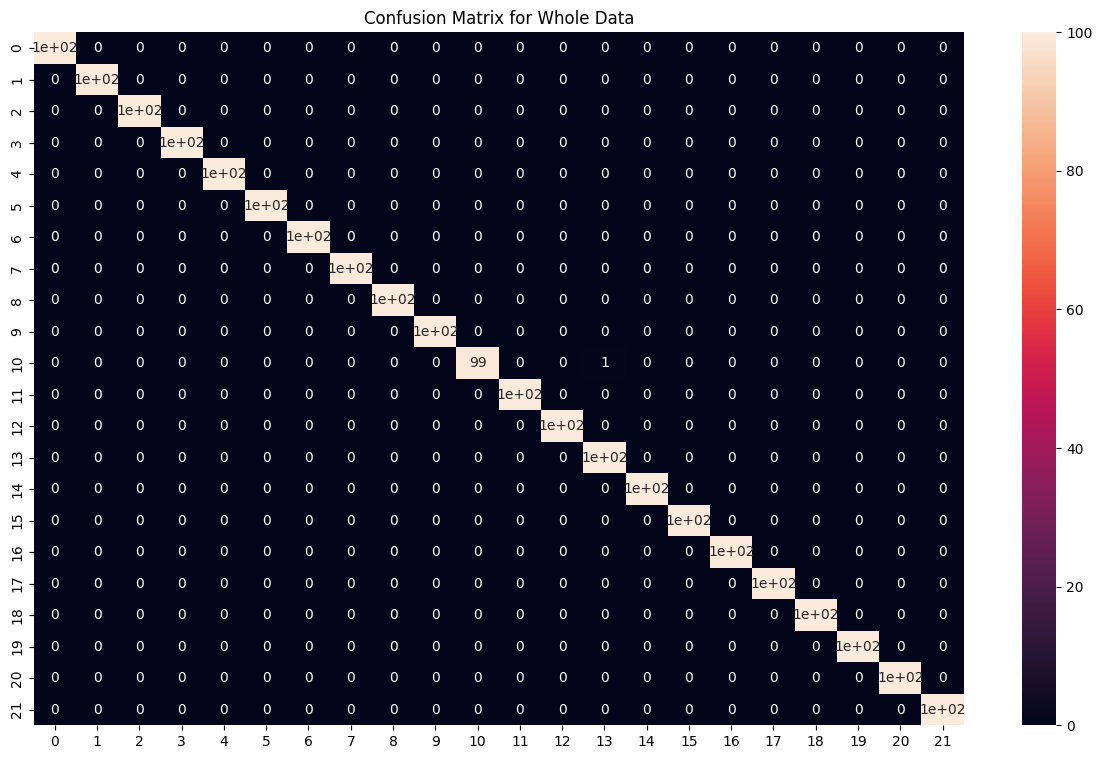

In [ ]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [ ]:
print("Please enter the values for prediction:")
user_input = []

for feature_name in X.columns:
    user_value = float(input(f"Enter the value for {feature_name}: "))
    user_input.append(user_value)

user_input = np.array(user_input).reshape(1, -1)
user_prediction = xgb_pipeline.predict(user_input)
user_prediction_label = label_dict.get(user_prediction[0], "Unknown Label")

print(f"Predicted class: {user_prediction_label}")

Please enter the values for prediction:
Enter the value for N: 90
Enter the value for P: 15
Enter the value for K: 52
Enter the value for temperature: 27
Enter the value for humidity: 91
Enter the value for ph: 6
Enter the value for rainfall: 23
Predicted class: millets


In [ ]:
print(xgboost.__version__)
import sklearn
print(sklearn.__version__)

2.0.1
1.3.2


In [ ]:
pickle.dump(xgb_pipeline, open("xgb_pipeline.pkl", "wb"))
pickle.dump(label_dict, open("label_dictionary.pkl", "wb"))
print("Saved All Models")

Saved All Models
